############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --##########################
############################################################################################

Modelos Clasificación : Regresión Logística, Regresión Logística Penalizada, Naive Bayes, K-NN.

Autores : José Cárdenas - André Chávez 

In [1]:
#######################################################################
##### Modelo de Regresión Logística y Logística Penalizada ############
#######################################################################

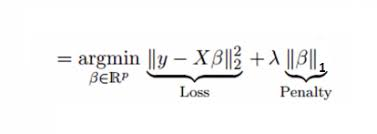

In [2]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [5]:
# Leer el dataset en un dataframe usando pandas
train = pd.read_csv("C:/Users/Administrador/Downloads/Clase 07_09.03/train.csv") 

In [6]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
#train.loc[(train['Gender']=='Female')|(train['Married']=='No'),['Gender','Married']]

In [8]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [10]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
#train_parametrica.head(5)

In [11]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())   

In [12]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [15]:
train_parametrica.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0


In [14]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [16]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], test_size=0.30)

In [ ]:
#######################################################################
##### Modelo de Regresión Logística ###################################
#######################################################################

In [17]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
#result.summary2()

Optimization terminated successfully.
         Current function value: 0.510270
         Iterations 6


In [18]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.206     
Dependent Variable: Loan_Status      AIC:              459.8119  
Date:               2019-03-09 12:08 BIC:              504.4879  
No. Observations:   429              Log-Likelihood:   -218.91   
Df Model:           10               LL-Null:          -275.75   
Df Residuals:       418              LLR p-value:      9.5740e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.2760   0.3162 -0.8729 0.3827 -0.8956  0.3437
Married            0.4058   0.2692  1.5075 0.1317 -0.1218  0.9333
Dependents         0.0913   0.1271  0.7182 0.4726 -0.1578  0.3403
Education         -0.8732   0.2722 -3.2085 0.0013 -1.4067 -0.3398
Self_Employed     -0.3135   0.3300 -0.9501 0.3421 -0.9603  0.3333
ApplicantIncome   -0.0000   0.0000 -0.3544 0.7230 -0.0001  0.0000
CoapplicantIncome -0.0001   0.0000 -1.6904 0.0910 -0.0002  0.0000
LoanAmount        -0.0019   0.0017 -1.1280 0.2593 -0.0053  0.0014
Loan_Amount_Term  -0.0089   0.0020 -4.4477 0.0000 -0.0128 -0.0050
Credit_History     2.9340   0.3663  8.0097 0.0000  2.2161  3.6519
Property_Area     -0.0329   0.1444 -0.2278 0.8198 -0.3159  0.2501
=================================================================

"""

In [19]:
## Paso N° 02 : Predecir sobre la data de test con el modelo entrenado
y_pred=result.predict(X_test)
y_pred2=np.where(y_pred<0.5,0,1)

In [20]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred2))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred2))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred2))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred2))

	Accuracy: 0.870

	Precision: 0.877
	Recall: 0.964
	F1: 0.918



In [21]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68        45
           1       0.88      0.96      0.92       140

   micro avg       0.87      0.87      0.87       185
   macro avg       0.86      0.77      0.80       185
weighted avg       0.87      0.87      0.86       185



In [35]:
#######################################################################
##### Modelo de Regresión Logística Penalizada ########################
#######################################################################

In [44]:
## Paso N° 01 : Entrenar un modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression(penalty='l2') # llamando al modelo de Regresion Logistica Ridge
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
## Paso N° 02 : Predecir sobre la data de test con el modelo entrenado
y_pred=lr.predict(X_test)

In [46]:
## Paso N° 03 : Evaluar indicadores
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.881

	Precision: 0.878
	Recall: 0.979
	F1: 0.926



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


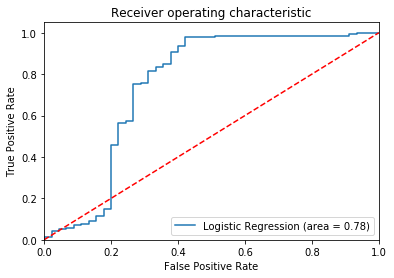

In [25]:
## Paso N° 03 : Evaluar indicadores

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from matplotlib import pyplot as plt

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [26]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.58      0.70        45
           1       0.88      0.98      0.93       140

   micro avg       0.88      0.88      0.88       185
   macro avg       0.89      0.78      0.81       185
weighted avg       0.88      0.88      0.87       185



In [49]:
## Paso N° 03 : Evaluar indicadores
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7) # Definimos el CV
lr = LogisticRegression(penalty='l2') # Definimos el algoritmo a utilizar
scoring = 'accuracy' # Definimos la métrica de evaluación

results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.779


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [30]:
## Paso N° 04: Puntuamos o scoreamos sobre información nueva o clientes sin VD.
# Como ya hemos entrenado un Modelo de Clasificación , podemos trabajar con el archivo de Test
test = pd.read_csv("C:/Users/Administrador/Downloads/Clase 07_09.03/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [31]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [32]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [33]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mean())  

In [35]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [52]:
test_parametrica.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3


In [51]:
# Eliminamos el ID para poder scorear o puntuar los registros
test_parametrica = test_parametrica.drop('Loan_ID', axis=1) 

KeyError: "['Loan_ID'] not found in axis"

In [53]:
y_final = lr.predict(test_parametrica) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

NotFittedError: This LogisticRegression instance is not fitted yet

In [74]:
#y_final

In [75]:
data = np.hstack((test['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1))) #junto el ID del test desl scoring con la prediccion final
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status']) #renombra las columnas
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']] #doy formato
df_submmit.to_csv('Reg_Logistica001.csv', index=False)  #exportacion

In [43]:
## !! Listo , lo evaluamos en AnalyticsVidhya !!

In [ ]:
#######################################################################
##### Modelo de Regresión Logística Penalizada Lasso ##################
#######################################################################

In [18]:
lr2 = LogisticRegression(penalty='l1') # Regresion Logistica Lasso (L1). L2 es Ridge
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#######################################################################
##### Modelo de Clasificación Bayesiano : de Naive Bayes ##############
#######################################################################

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [ ]:
#######################################################################
##### Modelo de Clasificación : K-NN ##################################
#######################################################################

In [48]:
from sklearn.neighbors import KNeighborsClassifier # Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')